#### MPAS unstructured triangular grid plots
 - sea mask and map the value to a specific color using a custom colormap where I manually set the color for that value.
 - Converts a xarray.DataArray into a uxarray.UxDataset
 - Interactive hvPlot
 - Matplotlib static plot and save the plot
 - Subsetting
     - Bounding box
     - Bounding circle
     - Nearest neighbor

From Michael Duda:
https://www2.mmm.ucar.edu/projects/mpas/tutorial/Howard2024/ <br>
regional_terrain.ncl

Ming Ge Feb 2025

In [1]:
import uxarray as ux
import cartopy.crs as ccrs 
import holoviews as hv 
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
dir_data = '/glade/derecho/scratch/duda/mpas_tutorial/240-48km_variable/'
flnm_grid = dir_data + 'SouthAmerica.static.nc' 
ds_i = ux.open_dataset(flnm_grid, flnm_grid)
uxgrid = ds_i.uxgrid 
ter = ds_i.ter
ivgtyp = ds_i.ivgtyp

#### Masking sea and converting xarray to Uxarray

In [3]:
# Center latitude and longitude
cenlat = 0.0
cenlon = 0.0

proj = ccrs.Orthographic(central_latitude=cenlat, central_longitude=cenlon)

ter_masked = ux.UxDataArray.from_xarray(xr.where(ivgtyp != 17, ter, -99), uxgrid)

#### interractive hvPlot

In [4]:
# Create a custom colormap
# Set the first color (-99) to specified colorand a different color for others
terrain_cmap = plt.colormaps['terrain']
cmap = ListedColormap(['skyblue'] + [terrain_cmap(i) for i in range(1, terrain_cmap.N)])

In [5]:
# Apply the colormap to hvplot
ter_masked.plot.polygons(backend='bokeh',projection=proj,  clim = (0, 4000), features=["states", "coastline"],
           periodic_elements="split", title=ter.long_name, cmap=cmap)

:Overlay
   .Image.I     :Image   [Longitude,Latitude]   (Longitude_Latitude var)
   .Coastline.I :Feature   [Longitude,Latitude]
   .States.I    :Feature   [Longitude,Latitude]

#### Switch to Matplotlib by specifying the backend parameter

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

:Overlay
   .Image.I     :Image   [Longitude,Latitude]   (Longitude_Latitude var)
   .Coastline.I :Feature   [Longitude,Latitude]
   .States.I    :Feature   [Longitude,Latitude]
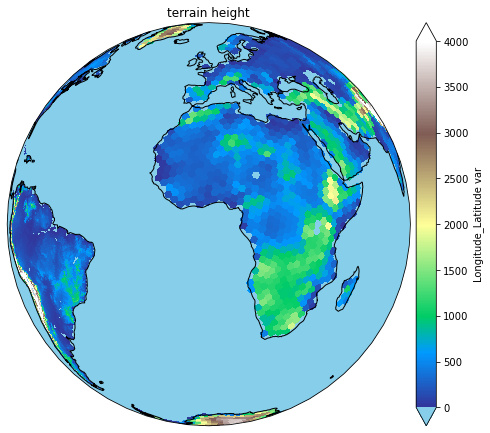

In [6]:
plot_plt = ter_masked.plot.polygons(backend='matplotlib', 
                         projection=proj, 
                         pixel_ratio = 4.0, 
                         features=["states", "coastline"], 
                         width=600, height=300, 
                         cmap=cmap, 
                         clim = (0, 4000),
                         periodic_elements="split", 
                         title=ter.long_name) 

#png, svg, html, or gif.    
hv.save(plot_plt, 'regional_terrain', fmt='png') # dpi = 300
plot_plt

#### Bounding box

:Overlay
   .Image.I     :Image   [x,y]   (x_y var)
   .Coastline.I :Feature   [Longitude,Latitude]
   .States.I    :Feature   [Longitude,Latitude]
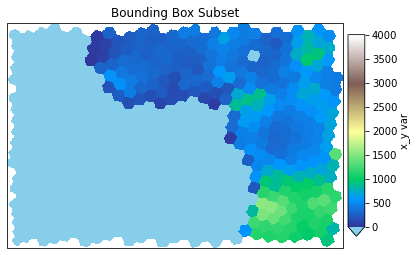

In [15]:
import geoviews.feature as gf
plot_opts = {"width" : 500, "height": 300}
features = gf.coastline(projection=proj,  scale='50m') * \
           gf.states(projection=proj,  scale='50m')
 
lon_bounds = (0 - 30, 0 + 30)
lat_bounds = (0 - 20, 0 + 20)
inverse_indices=(["face", "node", "edge"], True)
 
bbox_subset_nodes = ter_masked.subset.bounding_box(lon_bounds = lon_bounds, lat_bounds=lat_bounds)
bbox_subset_nodes.plot.polygons(backend='matplotlib', 
                                 cmap=cmap, 
                                 clim = (0, 4000),
                                 title="Bounding Box Subset",
                                 **plot_opts) * features


#### Bounding Circle
Using a center coordinate (lon, lat) and a radius (in degrees). The resulting subset will contain all elements within the radius of that circle.

:Overlay
   .Image.I     :Image   [x,y]   (x_y var)
   .Coastline.I :Feature   [Longitude,Latitude]
   .States.I    :Feature   [Longitude,Latitude]
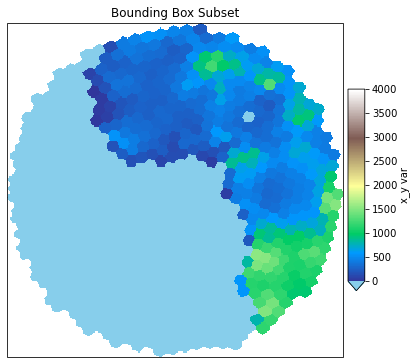

In [16]:
center_coord = [0, 0]
r = 30

bcircle_subset = ter_masked.subset.bounding_circle(center_coord, r)
bcircle_subset.plot.polygons(backend='matplotlib', 
                                 cmap=cmap, 
                                 clim = (0, 4000),
                                 title="Bounding Box Subset",
                                 **plot_opts) * features


#### Nearest Neighbor
perform a nearest neighbor subset at some center coordinate (lon, lat) and query for some number of elements k

:Overlay
   .Image.I     :Image   [x,y]   (x_y var)
   .Coastline.I :Feature   [Longitude,Latitude]
   .States.I    :Feature   [Longitude,Latitude]
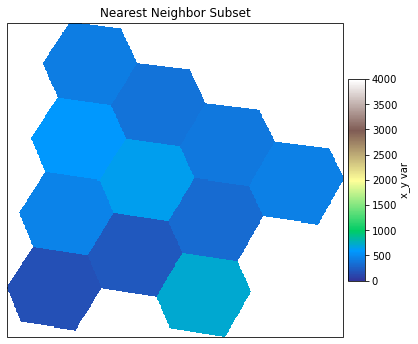

In [17]:
center_coord = [10, 10]
nn_subset = ter_masked.subset.nearest_neighbor(center_coord, k=10, element="nodes")

nn_subset.plot(backend='matplotlib', 
    cmap=cmap, 
    clim=(0, 4000),
    title="Nearest Neighbor Subset",
    **plot_opts) * features

#### For Comparison: plot from original PyNGL

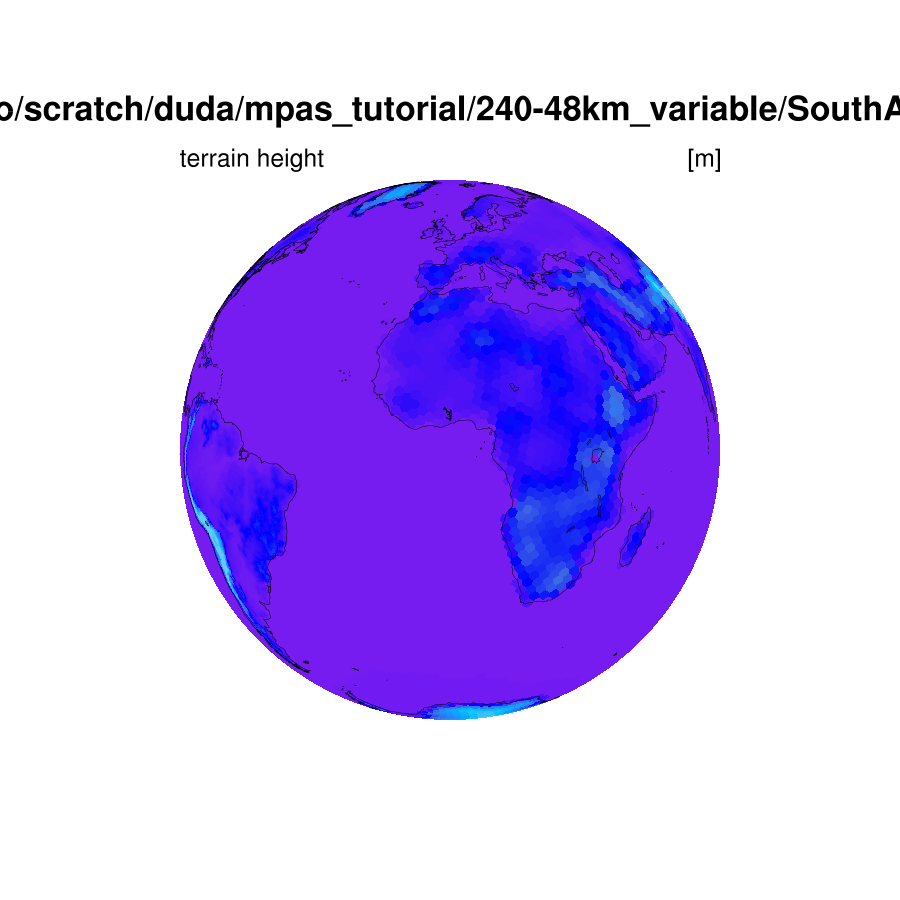

In [1]:
from IPython.display import Image
Image(filename=('/glade/u/home/mingge/NCL_2_PYTHON/regional_terrain.png'))